In [1]:
import pandas as pd
from matplotlib import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix

from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
import seaborn as sn

pd.options.display.max_rows = 15
pd.options.display.max_columns = 25

seed = 145

In [2]:
# data = pd.read_csv('../data/WA_Fn-UseC_-Telco-Customer-Churn.csv', index_col=0)
data = pd.read_csv('../data/logistic_data/train.csv', index_col=0)
val = pd.read_csv('../data/logistic_data/validation.csv', index_col=0)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data['TotalCharges'] = data['TotalCharges'].replace(' ', '0')

In [4]:
encoded_data = data.copy()
encoded_data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])
for i in data.columns:
    if encoded_data[i].dtype.name == 'object':
        encoder = LabelEncoder()
        encoded_data[i] = encoder.fit_transform(encoded_data[i])
encoded_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
5575-GNVDE,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
3668-QPYBK,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
7795-CFOCW,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
9237-HQITU,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


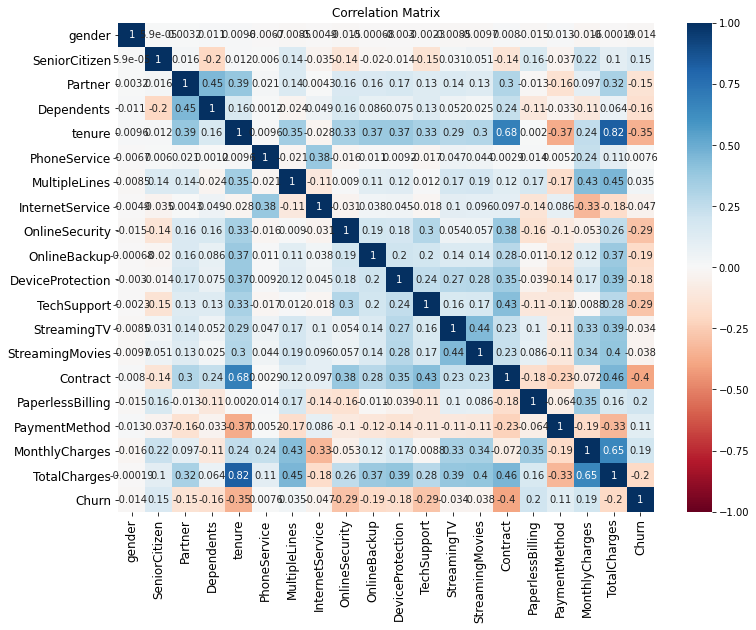

In [5]:
plt.figure(figsize=(12,9))
s = sn.heatmap(encoded_data.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize=12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize=12)
plt.title('Correlation Matrix')
plt.show()

In [6]:
x = encoded_data.drop(['Churn'], axis=1)
y = encoded_data['Churn']

In [7]:
rus = RandomUnderSampler(random_state=seed)
x_resampled, y_resampled = rus.fit_resample(x,y)
x_train, x_test, y_train, y_test = train_test_split(x_resampled,y_resampled, test_size=.25)

#### Data Cleaning and Preprocessing
*  Many categorical features to encoded (OneHotEncoding)
* Total charges change dtype from object to float

### Features
```
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=seed, n_jobs=4)
rf_classifier.fit(x_train, y_train)

rf_sfm = SelectFromModel(rf_classifier)
rf_sfm = rf_sfm.fit(x_train, y_train)


x_rf_train = rf_sfm.transform(x_train)
x_rf_test = rf_sfm.transform(x_test)
```

In [8]:
# classifier = RandomForestClassifier(n_estimators=100, random_state=seed, n_jobs=-1)
# classifier.fit(x_train, y_train)
# features_selector = SelectFromModel(classifier)
# features_selector.fit(x_train, y_train)
# x_fs_train = features_selector.transform(x_train)
# x_fs_test = features_selector.transform(x_test)

In [9]:
logistic_model = LogisticRegression(n_jobs=-1, max_iter=1000)
logistic_model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, n_jobs=-1)

In [10]:
y_pred = logistic_model.predict(x_test)

In [11]:
print(f'Accuracy: {accuracy_score(y_true=y_test, y_pred=y_pred)}')
print(f'F1 Score: {f1_score(y_true=y_test, y_pred=y_pred)}')
print(f'\n')
print(f'{classification_report(y_true=y_test, y_pred=y_pred)}')
confusion_matrix(y_test, y_pred)


Accuracy: 0.7761006289308177
F1 Score: 0.7885985748218527


              precision    recall  f1-score   support

           0       0.80      0.73      0.76       393
           1       0.75      0.83      0.79       402

    accuracy                           0.78       795
   macro avg       0.78      0.78      0.78       795
weighted avg       0.78      0.78      0.78       795



array([[285, 108],
       [ 70, 332]])

In [12]:
pred = logistic_model.predict(x_test[6:7])
pred

array([0])

In [14]:
from sklearn.model_selection import GridSearchCV

logistic = LogisticRegression(solver='liblinear', max_iter=10000)

In [15]:
# penalty = ['l2']
# C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
# class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]
# solver = ['liblinear', 'saga', 'newton-cg', 'lbfgs','sag']

# param_grid = dict(penalty=penalty, C=C, class_weight=class_weight, solver=solver)

# grid = GridSearchCV(estimator=logistic,
#                     param_grid=param_grid,
#                     scoring='roc_auc',
#                     verbose=1,
#                     n_jobs=-1)

# grid_result = grid.fit(x_train, y_train)

# print('Best Score: ', grid_result.best_score_)
# print('Best Params: ', grid_result.best_params_)


In [13]:
log = LogisticRegression(C=1, penalty='l2', solver="newton-cg", class_weight={1: 0.4, 0:0.6})


In [14]:
log.fit(x_train, y_train)
pre = log.predict(x_test)

In [15]:
print(f'Accuracy: {accuracy_score(y_true=y_test, y_pred=pre)}')
print(f'F1 Score: {f1_score(y_true=y_test, y_pred=pre)}')
print(f'\n')
print(f'{classification_report(y_true=y_test, y_pred=pre)}')
confusion_matrix(y_test, pre)

Accuracy: 0.7773584905660378
F1 Score: 0.7716129032258064


              precision    recall  f1-score   support

           0       0.76      0.81      0.78       393
           1       0.80      0.74      0.77       402

    accuracy                           0.78       795
   macro avg       0.78      0.78      0.78       795
weighted avg       0.78      0.78      0.78       795



array([[319,  74],
       [103, 299]])

0.7596371882086168

In [16]:
val.head(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,,,,,,,,,,,,,
1035-IPQPU,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.40
7398-LXGYX,Male,0,Yes,No,44,Yes,Yes,Fiber optic,Yes,No,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),84.80,3626.35
2823-LKABH,Female,0,No,No,18,Yes,Yes,Fiber optic,No,No,Yes,Yes,No,Yes,Month-to-month,Yes,Bank transfer (automatic),95.05,1679.40
8775-CEBBJ,Female,0,No,No,9,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35


In [17]:
val_copy = val.copy()
val_copy['TotalCharges'] = pd.to_numeric(val_copy['TotalCharges'])
for i in val_copy.columns:
    if val_copy[i].dtype.name == 'object':
        encoder = LabelEncoder()
        val_copy[i] = encoder.fit_transform(val_copy[i])
val_copy.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,,,,,,,,,,,,,
1035-IPQPU,0,1,1,0,63,1,2,1,0,2,2,0,2,2,0,1,2,103.50,6479.40
7398-LXGYX,1,0,1,0,44,1,2,1,2,0,2,0,0,0,0,1,1,84.80,3626.35
2823-LKABH,0,0,0,0,18,1,2,1,0,0,2,2,0,2,0,1,0,95.05,1679.40
8775-CEBBJ,0,0,0,0,9,1,0,0,0,0,0,0,0,0,0,1,0,44.20,403.35
0550-DCXLH,1,0,0,0,13,1,0,0,0,2,0,2,2,2,0,0,3,73.35,931.55


In [18]:
val_copy['Churn'] = log.predict(val_copy)
val_copy.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
1035-IPQPU,0,1,1,0,63,1,2,1,0,2,2,0,2,2,0,1,2,103.50,6479.40,1
7398-LXGYX,1,0,1,0,44,1,2,1,2,0,2,0,0,0,0,1,1,84.80,3626.35,0
2823-LKABH,0,0,0,0,18,1,2,1,0,0,2,2,0,2,0,1,0,95.05,1679.40,1
8775-CEBBJ,0,0,0,0,9,1,0,0,0,0,0,0,0,0,0,1,0,44.20,403.35,1
0550-DCXLH,1,0,0,0,13,1,0,0,0,2,0,2,2,2,0,0,3,73.35,931.55,0


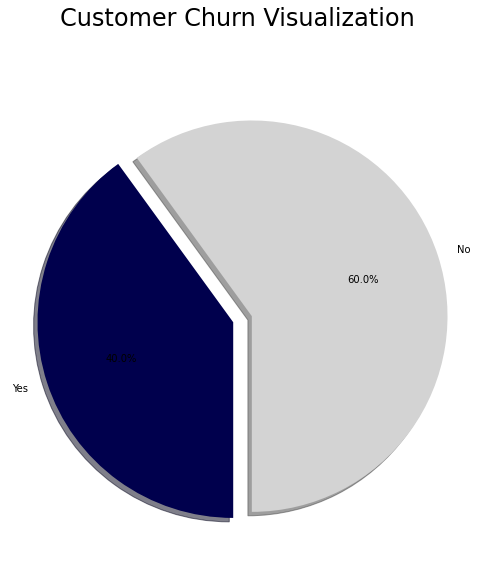

In [41]:
sizes = val_copy['Churn'].value_counts(sort = True) # so this line of code riri kuita error ku back end , and ndiro racho riri ku counter kut each 
# kut '1's mangeni and '0''s mangani, like ndizvo zvazvichikunze the last error yandagadzirisa pa churn
colors = ["lightgray","#00004d"]
rcParams['figure.figsize'] = 5,5
explode = (0, 0.1)

fig1, ax = plt.subplots(figsize=(16,9))
fig1.suptitle('Customer Churn Visualization', fontsize=24)
plot = ax.pie(sizes, labels=['No', 'Yes'], colors=colors, autopct='%1.1f%%', shadow=True, startangle=270, explode=explode)
plt.show()
fig1.savefig('./plots/customer_churn_visualization.jpg')


In [21]:
print(len(val_copy[val_copy['Churn'] == 1]))
print(len(val_copy[val_copy['Churn'] == 0]))

8
12
